In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import TextVectorization, Embedding, MaxPooling2D, LSTM, SpatialDropout1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.data import Dataset

# Data Loading

In [78]:
df_dev = pd.read_csv("dataset\subtaskB_clean_dev_cased_3col.csv")
df_dev.head()

,comment_text,topic,conspiracy
0,"Siamo davanti ad una prova, e non solo di quoz...",Qanon,1
1,La storia dei 2 bimbi di Bergamo - vaccini: qu...,Covid,0
2,L'avete capito che non toglieranno il green pa...,Covid,0
3,Quindi la farsa dello spazio e della terra a ...,Terra Piatta,3
4,"In breve tempo, per accedere a Internet, sarà ...",Qanon,1


In [79]:
list(df_dev['comment_text'])

['Siamo davanti ad una prova, e non solo di quoziente intellettivo, ma spirituale. Qui lintelligenza non centra, è questione di apertura mentale, di aver il coraggio di mettere in discussione il sistema, di crearsi la propria opinione da soli, facendo ognuno le proprie ricerche, fidandosi del proprio istinto, delle proprie sensazioni ed usando il discernimento, senza bersi a priori quello che il sistema ci vende ogni giorno. Vuol dire rimettere in gioco tutto, il nostro passato, la nostra istruzione, le nostre credenze. Allinizio è dura, molto dura, ma poi ti senti libero. La gente si sta svegliando, ma ognuno ha i propri tempi, vanno rispettati. Capisco che per molti sia frustrante, ma rendetevi conto che siete fortunati, siete liberi con tutti i costi del caso. Potrete raccontare ai vostri figli, ai vostri nipoti quello che avete fatto in questi tempi bui',
 'La storia dei 2 bimbi di Bergamo - vaccini: qusto giornale non accenna neppure alla strana coincidenza',
 "L'avete capito che 

In [80]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  810 non-null    object
 1   topic         810 non-null    object
 2   conspiracy    810 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.1+ KB


In [81]:
df_dev.conspiracy.value_counts()

0    435
1    242
3     76
2     57
Name: conspiracy, dtype: int64

Il task è sbilanciato.

In [82]:
df_dev.iloc[(1, 0)]

'La storia dei 2 bimbi di Bergamo - vaccini: qusto giornale non accenna neppure alla strana coincidenza'

# Additional Text Preprocessing

In [83]:
import re
import nltk

In [84]:
from nltk.corpus import stopwords

In [85]:
print(stopwords.words('italian'))

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

In [86]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian'))

In [87]:
def clean_text(text):
    """ text: a string
        return: modified initial string """
    text = text.lower() # lowercase text
    text = re.sub(r'[/(){}\[\]\|@,;]', ' ', text) # substitute the matched string with space.
    text = re.sub(r'[#+_]', '', text) # substitute bad symbols with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_dev['comment_text'] = df_dev['comment_text'].apply(clean_text)
df_dev['comment_text'] = df_dev['comment_text'].str.replace('\d+', '')

C:\Users\irene\AppData\Local\Temp\ipykernel_6152\3936189919.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dev['comment_text'] = df_dev['comment_text'].str.replace('\d+', '')


In [88]:
df_dev.iloc[(1, 0)]

'storia  bimbi bergamo - vaccini: qusto giornale accenna neppure strana coincidenza'

In [89]:
#%pip install wordcloud

In [90]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [91]:
import matplotlib.pyplot as plt

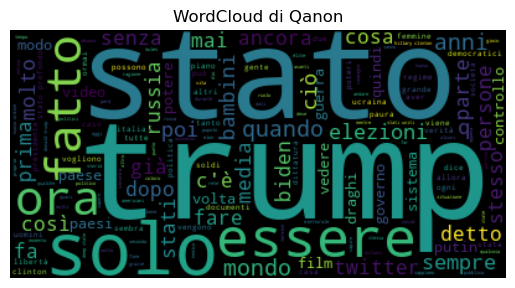

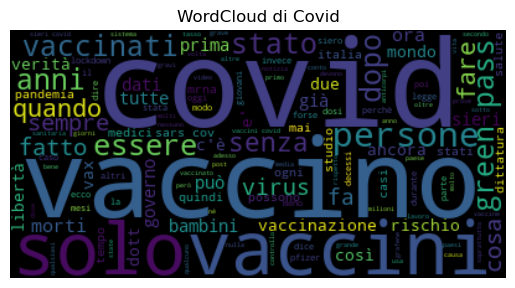

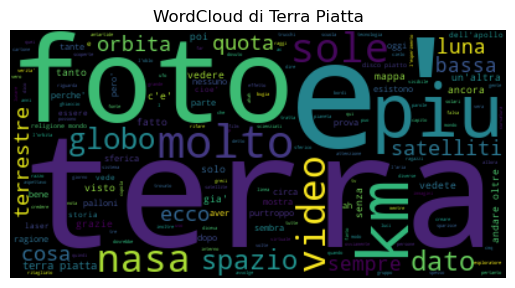

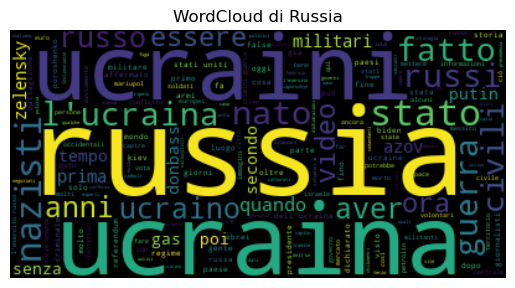

In [92]:
for topic in df_dev.topic.unique():
    text = ''
    for post in list(df_dev[df_dev['topic'] == topic].comment_text):
        text += post
    cloud = WordCloud(#width=520,
                      #height=260,
                      stopwords=STOPWORDS,
                      #max_font_size=50,
                      #background_color = "black", colormap = 'Pastel1'
                     ).generate(text)
    #plt.figure(figsize=(16,10))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off') # turn off axis
    plt.title(f'WordCloud di {topic}')
    plt.show()

In [93]:
max_length = 0
for post in list(df_dev.comment_text):
    post_length = len(post.split())
    # print(post_length)
    if post_length > max_length:
        max_length = post_length

In [94]:
max_length

364

In [95]:
X_dev = df_dev.comment_text.values

In [96]:
y_dev = df_dev.conspiracy.values

In [97]:
len(X_dev), len(y_dev)

(810, 810)

# Data Splitting

In [136]:
# Extract a training & validation split
validation_split = 0.12
num_validation_samples = int(validation_split * len(X_dev))
num_validation_samples

97

In [137]:
X_train = X_dev[:-num_validation_samples]
len(X_train)

713

In [138]:
X_val = X_dev[-num_validation_samples:]
len(X_val)

97

In [139]:
y_train = y_dev[:-num_validation_samples]
len(y_train)

713

In [140]:
y_val = y_dev[-num_validation_samples:]
len(y_val)

97

# Text Vectorization

In [141]:
vectorize_layer = TextVectorization(max_tokens=20000, # Max vocabulary size (to specifiy when adapting a vocabulary)
                                    output_sequence_length=max_length) # output dim padded or truncated => tensor of shape (batch_size, output_sequence_length)
text_ds = Dataset.from_tensor_slices(X_train)
text_ds

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [142]:
(list(text_ds.as_numpy_iterator()))[0]

b'davanti prova solo quoziente intellettivo spirituale. qui lintelligenza centra questione apertura mentale aver coraggio mettere discussione sistema crearsi propria opinione soli ognuno proprie ricerche fidandosi proprio istinto proprie sensazioni usando discernimento senza bersi priori sistema vende ogni giorno. vuol dire rimettere gioco passato istruzione credenze. allinizio dura molto dura poi senti libero. gente svegliando ognuno propri tempi vanno rispettati. capisco molti frustrante rendetevi conto fortunati liberi costi caso. potrete raccontare figli nipoti fatto tempi bui'

text_ds contiene tutti i post, ogni post è di tipo bytes.

In [143]:
vectorize_layer.adapt(text_ds.batch(64))

In [144]:
vectorize_layer.get_vocabulary()[:15]

['',
 '[UNK]',
 'covid',
 'solo',
 'essere',
 'stato',
 'anni',
 'vaccino',
 'persone',
 'vaccini',
 'dopo',
 'ora',
 'quando',
 'fatto',
 'trump']

In [145]:
vocabulary = vectorize_layer.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))
len(vocabulary)

9620

## Word Embeddings

In [146]:
embedding_dim = 128

In [109]:
embeddings_path = '..\..\itwac128.txt'

In [110]:
def load_word_embeddings(emb_path):
    '''crea un dizionario contenente gli embedding di parole presente nel file src_path'''
    embeddings = dict() # dizionario che conterrà gli embedding
    for line in open(emb_path, 'r'):
        line = line.strip().split('\t')
        word = line[0]
        embedding = line[1:]
        embedding = [float(comp) for comp in embedding] # convertiamo le componenti dell'embedding in float
        embeddings[word] = np.asarray(embedding) # trasformiamo la lista delle componenti in un vettore di numpy
    return embeddings

In [111]:
embeddings = load_word_embeddings(embeddings_path)

In [112]:
len(embeddings)

1247492

In [113]:
len(embeddings[','])

128

### Creazione di una matrice di embeddings

Now, let's prepare a corresponding embedding matrix that we can use in a Keras Embedding layer. It's a simple NumPy matrix where entry at index i is the embedding for the word of index i in our vectorizer's vocabulary.

In [114]:
len(vocabulary)

8318

In [115]:
def embedding_init(shape, dtype):
    num_tokens = shape[0]
    embedding_dim = shape[1]
    #num_tokens = len(vocabulary) + 2
    #embedding_dim = 128
    hits = 0
    misses = 0
    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    # print("Converted %d words (%d misses)" % (hits, misses))
    return embedding_matrix

# Model Building

In [116]:
from tensorflow.keras import Input

In [147]:
x_train = vectorize_layer(np.array([[s] for s in X_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in X_val])).numpy()

y_train = np.array(y_train)
y_val = np.array(y_val)

In [148]:
model = Sequential()
# Start by creating an explicit input layer. It needs to have a shape of (1,) (because we need to guarantee that
# there is exactly one string input per batch), and the dtype needs to be 'string'.
#model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
# The first layer in our model is the vectorization layer. After this layer, we have a tensor of shape
# (batch_size, max_len) containing vocab indices.
#model.add(vectorize_layer)

Now, the model can map strings to integers, and you can add an embedding layer to map these integers to learned embeddings.

Embedding Layer Arguments

* input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
* output_dim: Integer. Dimension of the dense embedding.
* embeddings_initializer: Initializer for the embeddings matrix (see keras.initializers).
* embeddings_regularizer: Regularizer function applied to the embeddings matrix (see keras.regularizers).
* embeddings_constraint: Constraint function applied to the embeddings matrix (see keras.constraints).
* mask_zero: Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is True, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary (input_dim should equal size of vocabulary + 1).
* input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
* sparse: If True, calling this layer returns a tf.SparseTensor. If False, the layer returns a dense tf.Tensor. For an entry with no features in a sparse tensor (entry with value 0), the embedding vector of index 0 is returned by default.

In [149]:
# >>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch, input_length), and the largest integer (i.e.
# word index) in the input should be no larger than 999 (vocabulary size).
# Now model.output_shape is (None, 10, 64), where `None` is the batch dimension.
model.add(Embedding(
    input_dim = len(vocabulary),
    output_dim = embedding_dim,
    embeddings_initializer=embedding_init,
    input_length=max_length)) 
    #mask_zero=True)) # 0-padding should be masked out

In [150]:
model.add(SpatialDropout1D(0.2))

LSTM arguments:
* units: Positive integer, dimensionality of the output space.
* activation: Activation function to use. Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).
* recurrent_activation: Activation function to use for the recurrent step. Default: sigmoid (sigmoid). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).

In [151]:
RNN_HIDDEN_SIZE = 100

In [152]:
model.add(LSTM(RNN_HIDDEN_SIZE, dropout=0.2, recurrent_dropout=0.2))

In [153]:
model.add(Dropout(0.2))

In [154]:
model.add(Dense(50))

In [155]:
model.add(Dense(4, activation='softmax'))

In [156]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 364, 128)          1231360   
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 364, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 100)               91600     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 4)                 204       
                                                      

In [157]:
# plot_model(model, show_shapes=True)

In [158]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [159]:
x_train.shape

(713, 364)

In [160]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
23/23 [==============================] - 10s 323ms/step - loss: 1.2064 - accuracy: 0.5147 - val_loss: 1.0480 - val_accuracy: 0.6804
Epoch 2/10
23/23 [==============================] - 7s 306ms/step - loss: 1.1341 - accuracy: 0.5175 - val_loss: 1.0867 - val_accuracy: 0.6804
Epoch 3/10
23/23 [==============================] - 10s 451ms/step - loss: 1.1312 - accuracy: 0.5161 - val_loss: 1.0424 - val_accuracy: 0.6804
Epoch 4/10
23/23 [==============================] - 12s 509ms/step - loss: 1.1274 - accuracy: 0.5175 - val_loss: 1.0652 - val_accuracy: 0.6804
Epoch 5/10
23/23 [==============================] - 11s 505ms/step - loss: 1.1355 - accuracy: 0.5175 - val_loss: 1.0392 - val_accuracy: 0.6804
Epoch 6/10
23/23 [==============================] - 11s 492ms/step - loss: 1.1314 - accuracy: 0.5161 - val_loss: 1.0179 - val_accuracy: 0.6804
Epoch 7/10
23/23 [==============================] - 11s 500ms/step - loss: 1.1244 - accuracy: 0.5175 - val_loss: 1.0232 - val_accuracy: 0.6804


In [161]:
history = model.history

In [162]:
import matplotlib.pyplot as plt

In [163]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

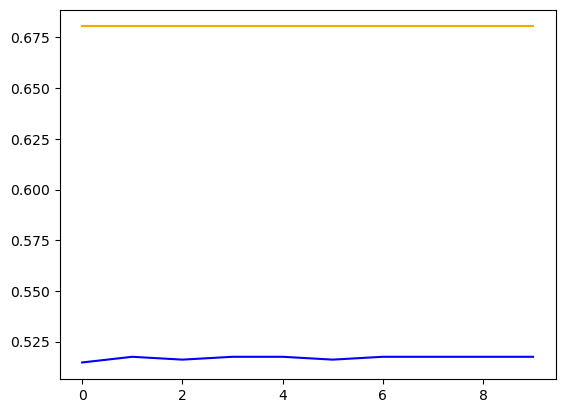

In [164]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='orange')
plt.show()

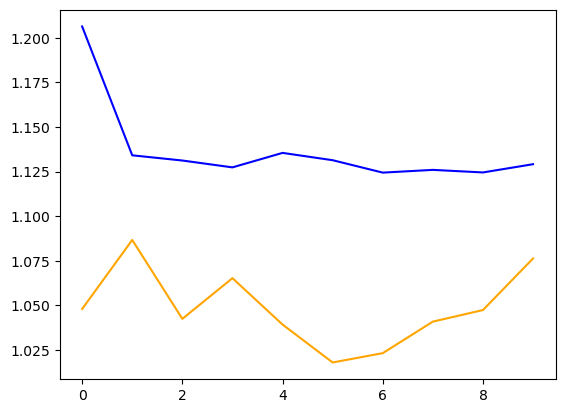

In [165]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.show()

https://keras.io/examples/nlp/pretrained_word_embeddings/